# Algoritmo de Bellman-Ford

O algoritmo de Bellman-Ford é um método fundamental para encontrar o menor caminho em 
grafos que podem conter **pesos negativos** — algo que algoritmos como Dijkstra não são 
capazes de lidar. Além disso, ele também detecta a existência de **ciclos negativos**, que 
representam inconsistências ou vantagens infinitas dentro do grafo.

Para esta implementação, simulamos um **problema real de cálculos financeiros entre contas 
interdependentes**. Cada vértice representa uma conta ou setor financeiro, e cada aresta 
representa uma **transferência ou ajuste** entre esses setores. Os pesos representam:

- valores positivos → custos ou débitos,
- valores negativos → créditos automáticos, bonificações, devoluções ou correções.

Este tipo de sistema é comum em:
- empresas com múltiplos centros de custo,
- bancos digitais,
- carteiras integradas,
- plataformas de cashback,
- sistemas corporativos de rateio.

Os valores negativos representam ajustes financeiros que reduzem o custo total do caminho — 
algo que Bellman-Ford consegue interpretar perfeitamente.

O objetivo é descobrir **qual é o custo financeiro mínimo** para transferir um valor do setor 
principal (vértice inicial) até qualquer outro setor do sistema, levando em conta todos os 
débitos e créditos disponíveis ao longo do caminho.

A ideia geral do algoritmo é a seguinte:

1. Todas as contas começam com custo infinito (como se fossem inacessíveis).
2. A conta inicial recebe custo 0.
3. Para cada aresta do grafo, tenta-se melhorar o custo acumulado aplicando o processo de 
   *relaxamento*:
   dist[v] > dist[u] + peso(u, v) → dist[v] é atualizado
4. Esse processo é repetido **|V| − 1 vezes**, garantindo que todos os menores caminhos 
possíveis sejam encontrados.
5. Por fim, realiza-se uma verificação extra: se ainda for possível melhorar algum custo, 
isso significa que existe um **ciclo negativo**, o equivalente a uma “falha” no sistema 
financeiro — um loop infinito de ganhos ou descontos.

Bellman-Ford funciona porque, ao repetir o relaxamento de todas as rotas várias vezes, ele 
garante que todos os caminhos com bonificações ou descontos negativos serão avaliados, 
produzindo a melhor rota financeira possível.


In [1]:
# Classe que representa uma aresta do grafo.
class Edge:
    def __init__(self, u, v, weight):
        self.u = u
        self.v = v
        self.weight = weight

In [2]:
# Grafo simples armazenado como lista de arestas.
# Não usamos matriz ou lista de adjacência porque o Bellman-Ford
# precisa iterar sobre TODAS as arestas o tempo todo.
class Graph:
    def __init__(self, num_vertices):
        self.V = num_vertices  # quantidade de vértices
        self.edges = []  # lista que armazenará todas as arestas

    def add_edge(self, u, v, w):
        # Adiciona uma aresta ao grafo.
        self.edges.append(Edge(u, v, w))

In [3]:
import math

# Classe que implementa o algoritmo de Bellman-Ford.
# Ela recebe um grafo e permite executar o cálculo dos menores caminhos.
class BellmanFord:
    def __init__(self, graph):
        self.graph = graph

        # dist[v] guarda o menor custo conhecido até o vértice v.
        # Inicializamos com infinito, pois no começo nada é conhecido.
        self.dist = [math.inf] * graph.V

        # pred[v] guarda o predecessor de v no menor caminho encontrado.
        # Isso é necessário para reconstruir o caminho depois.
        self.pred = [-1] * graph.V

    def run(self, source):
        # O custo do vértice inicial é zero, pois começamos nele.
        self.dist[source] = 0

        # Fase principal do Bellman-Ford:
        # Repetimos |V| - 1 vezes o processo de relaxamento.
        # Isso garante que qualquer caminho mais longo possível será considerado.
        for _ in range(self.graph.V - 1):
            # Itera sobre todas as arestas do grafo
            for edge in self.graph.edges:
                u, v, w = edge.u, edge.v, edge.weight

                # Verifica se a distância até u não é infinita
                # e se passando por u podemos melhorar a distância até v.
                if self.dist[u] != math.inf and self.dist[v] > self.dist[u] + w:
                    self.dist[v] = self.dist[u] + w
                    self.pred[v] = u  # guarda para reconstruir o caminho depois

        # Após as repetições, fazemos uma verificação extra.
        # Se ainda for possível relaxar alguma aresta, significa que existe
        # um ciclo negativo — algo crítico em sistemas financeiros.
        for edge in self.graph.edges:
            u, v, w = edge.u, edge.v, edge.weight
            if self.dist[u] != math.inf and self.dist[v] > self.dist[u] + w:
                raise ValueError("Ciclo negativo detectado no sistema financeiro!")

        return self.dist

    def path_to(self, target):
        # Reconstrói o caminho do vértice inicial até 'target'.
        # Se o destino é infinito, significa que não há caminho possível.
        if self.dist[target] == math.inf:
            return None

        path = []
        # Volta pelos predecessores até o início
        while target != -1:
            path.append(target)
            target = self.pred[target]

        # O caminho foi construído ao contrário, então invertamos
        return list(reversed(path))

In [4]:
import networkx as nx
import matplotlib.pyplot as plt


def plot_graph(graph):
    G = nx.DiGraph()

    for edge in graph.edges:
        G.add_edge(edge.u, edge.v, weight=edge.weight)

    pos = nx.spring_layout(G, seed=42)

    plt.figure(figsize=(12, 6))
    nx.draw(
        G,
        pos,
        with_labels=True,
        node_size=900,
        node_color="lightblue",
        font_size=12,
        arrowsize=20,
    )

    labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color="red")

    plt.title("Rede Financeira — Ajustes e Custos entre Setores")
    plt.show()

Grafo financeiro criado com sucesso!


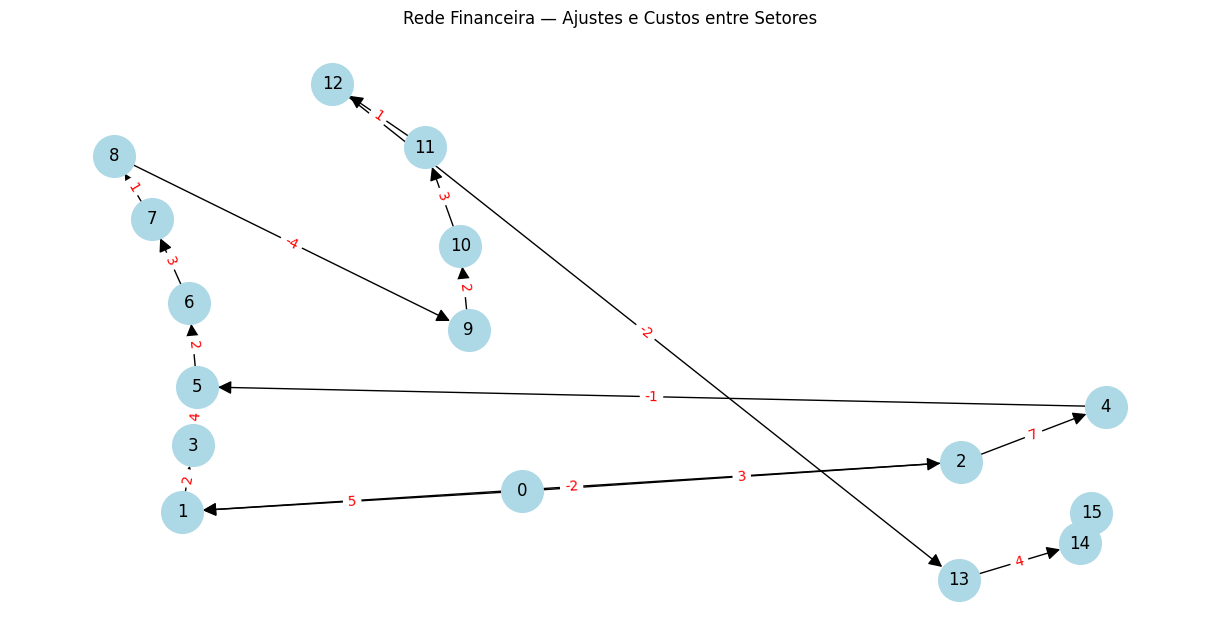

In [5]:
# Criamos um grafo com 16 setores financeiros.
g = Graph(16)

# Aqui estão as conexões entre setores, simulando débitos e créditos.
# Valores negativos representam bônus, ajustes contábeis ou devoluções.
ajustes_financeiros = [
    (0, 1, 5),
    (0, 2, 3),
    (1, 3, 2),
    (2, 1, -2),  
    (2, 4, 7),
    (3, 5, 4),
    (4, 5, -1),  
    (5, 6, 2),
    (6, 7, 3),
    (7, 8, 1),
    (8, 9, -4),  
    (9, 10, 2),
    (10, 11, 3),
    (11, 12, 1),
    (12, 13, -2),
    (13, 14, 4),
    (14, 15, 6),
]

# Adicionamos cada aresta ao grafo
for u, v, w in ajustes_financeiros:
    g.add_edge(u, v, w)

print("Grafo financeiro criado com sucesso!")

plot_graph(g)

In [6]:
bf = BellmanFord(g)
distancias = bf.run(0)

print("\nMenor custo financeiro do setor 0 até os demais:\n")
for v, d in enumerate(distancias):
    print(f"Setor {v}: custo = {d}")


Menor custo financeiro do setor 0 até os demais:

Setor 0: custo = 0
Setor 1: custo = 1
Setor 2: custo = 3
Setor 3: custo = 3
Setor 4: custo = 10
Setor 5: custo = 7
Setor 6: custo = 9
Setor 7: custo = 12
Setor 8: custo = 13
Setor 9: custo = 9
Setor 10: custo = 11
Setor 11: custo = 14
Setor 12: custo = 15
Setor 13: custo = 13
Setor 14: custo = 17
Setor 15: custo = 23


In [7]:
destino = 15
caminho = bf.path_to(destino)

print(f"\nCaminho financeiro mais barato até o setor {destino}:")
print(" -> ".join(map(str, caminho)))


Caminho financeiro mais barato até o setor 15:
0 -> 2 -> 1 -> 3 -> 5 -> 6 -> 7 -> 8 -> 9 -> 10 -> 11 -> 12 -> 13 -> 14 -> 15
